In [1]:
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import  image_dataset_from_directory
from tensorflow.keras import optimizers

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Number of training examples:", len(train_images))
print("Number of testing examples:", len(test_images))
print("Number of unique labels:", len(set(train_labels)))
print("Original train_labels shape:", train_labels.shape)
print("Training set image size:", train_images.shape[1:])
print("Testing set image size:", test_images.shape[1:])

Number of training examples: 60000
Number of testing examples: 10000
Number of unique labels: 10
Original train_labels shape: (60000,)
Training set image size: (28, 28)
Testing set image size: (28, 28)


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8714 - loss: 0.4066
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9846 - loss: 0.0507
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0329
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9919 - loss: 0.0256
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9942 - loss: 0.0187


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9885 - loss: 0.0434
Test loss: 0.03494083136320114
Test accuracy: 0.9911999702453613


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss'])

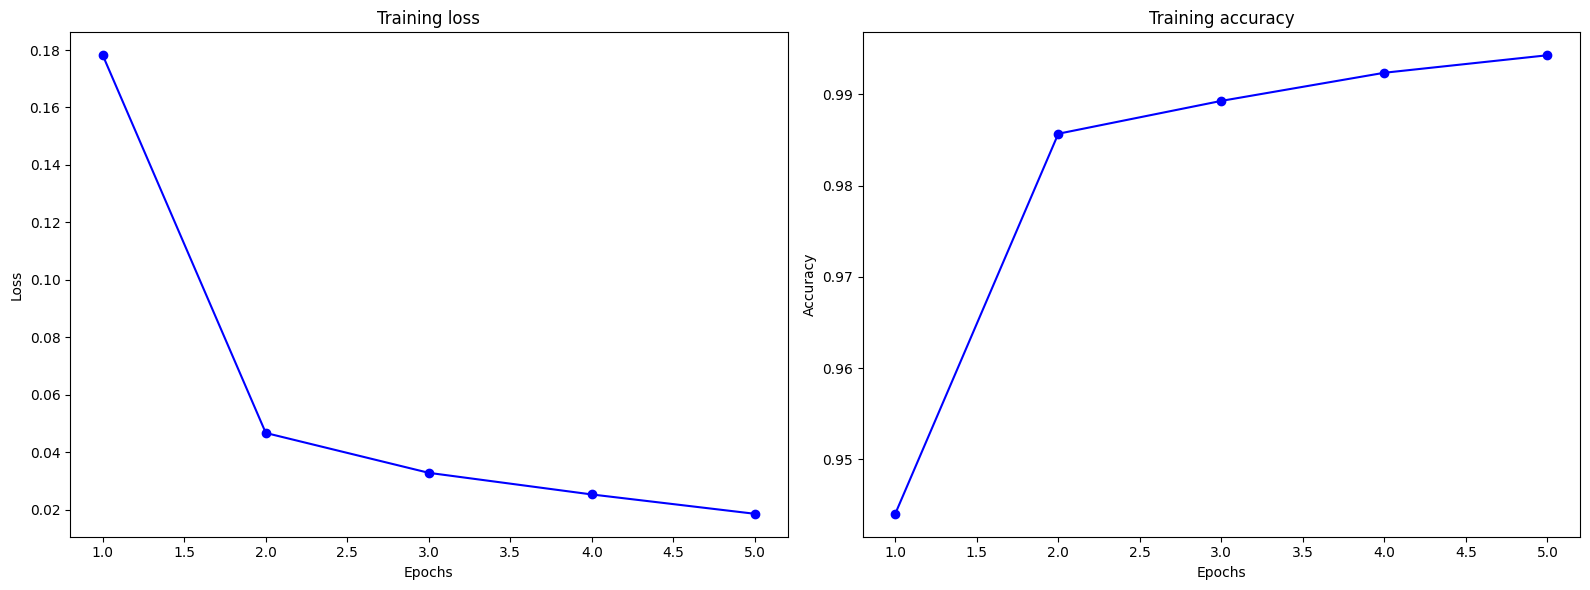

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
epochs = range(1, len(history_dict['accuracy']) + 1)

ax1.plot(epochs, history_dict['loss'], 'b-o')
ax1.set_title('Training loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')

ax2.plot(epochs, history_dict['accuracy'], 'b-o')
ax2.set_title('Training accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [14]:
import os
import shutil
import random

def clone_and_prepare_dataset(github_repo='https://github.com/laxmimerit/dog-cat-full-dataset.git'):
    # Remove existing dataset directory if it exists
    if os.path.exists('dog-cat-full-dataset'):
        print("Removing existing directory 'dog-cat-full-dataset'...")
        shutil.rmtree('dog-cat-full-dataset')

    # Remove existing class directories if they exist
    for subset in ['train', 'validation', 'test']:
        if os.path.exists(subset):
            print(f"Removing existing '{subset}' directory...")
            shutil.rmtree(subset)

    print("Cloning the repository...")
    !git clone {github_repo}

    base_dir = 'dog-cat-full-dataset/data'
    print(f"Checking contents of base directory: {base_dir}")

    if os.path.exists(base_dir):
        print("Files in base directory:")
        print(os.listdir(base_dir))
    else:
        print(f"Directory {base_dir} does not exist.")
        return

    # Create target directories
    os.makedirs('train/class_a', exist_ok=True)
    os.makedirs('train/class_b', exist_ok=True)
    os.makedirs('validation/class_a', exist_ok=True)
    os.makedirs('validation/class_b', exist_ok=True)
    os.makedirs('test/class_a', exist_ok=True)
    os.makedirs('test/class_b', exist_ok=True)

    cat_images = []
    dog_images = []

    for label in ['train', 'test']:
        for subdir in ['cats', 'dogs']:
            image_dir = os.path.join(base_dir, label, subdir)
            if os.path.exists(image_dir):
                images = os.listdir(image_dir)
                for img in images:
                    if subdir == 'cats':
                        cat_images.append(os.path.join(image_dir, img))
                    elif subdir == 'dogs':
                        dog_images.append(os.path.join(image_dir, img))

    print(f"Found {len(cat_images)} cat images and {len(dog_images)} dog images.")

    # Shuffle the lists to ensure randomness
    random.shuffle(cat_images)
    random.shuffle(dog_images)

    # Move images to train, validation, and test sets
    for i, img in enumerate(cat_images):
        if i < 1000:
            shutil.move(img, os.path.join('train/class_a', os.path.basename(img)))
        elif i < 1500:  # Next 500 for validation
            shutil.move(img, os.path.join('validation/class_a', os.path.basename(img)))
        elif i < 2000:  # Next 500 for test
            shutil.move(img, os.path.join('test/class_a', os.path.basename(img)))

    for i, img in enumerate(dog_images):
        if i < 1000:
            shutil.move(img, os.path.join('train/class_b', os.path.basename(img)))
        elif i < 1500:  # Next 500 for validation
            shutil.move(img, os.path.join('validation/class_b', os.path.basename(img)))
        elif i < 2000:  # Next 500 for test
            shutil.move(img, os.path.join('test/class_b', os.path.basename(img)))

    print('Dataset cloned and organized into train, validation, and test sets!')

# Call the function to clone and prepare the dataset
clone_and_prepare_dataset()


Removing existing directory 'dog-cat-full-dataset'...
Removing existing 'train' directory...
Removing existing 'validation' directory...
Removing existing 'test' directory...
Cloning the repository...
Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027 (from 1)
Receiving objects: 100% (25027/25027), 541.62 MiB | 25.62 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (25001/25001), done.
Checking contents of base directory: dog-cat-full-dataset/data
Files in base directory:
['train', 'test']
Found 12500 cat images and 12500 dog images.
Dataset cloned and organized into train, validation, and test sets!


In [15]:
def count_images_in_directories(base_path='/content'):
    directory_structure = {
        'train': {'class_a': 0, 'class_b': 0},
        'validation': {'class_a': 0, 'class_b': 0},
        'test': {'class_a': 0, 'class_b': 0},
    }

    for set_type in directory_structure.keys():
        for class_type in directory_structure[set_type].keys():
            dir_path = os.path.join(base_path, set_type, class_type)
            if os.path.exists(dir_path):
                directory_structure[set_type][class_type] = len([f for f in os.listdir(dir_path) if f.endswith(('jpg', 'jpeg', 'png'))])
            else:
                print(f"Directory {dir_path} does not exist.")

    return directory_structure

def print_image_counts(image_counts):
    print("Image counts in each directory:")
    for set_type, classes in image_counts.items():
        print(f"\n{set_type.capitalize()} Set:")
        for class_type, count in classes.items():
            print(f"  {class_type.capitalize()}: {count} images")

image_counts = count_images_in_directories(base_path='/content')
print_image_counts(image_counts)

Image counts in each directory:

Train Set:
  Class_a: 1000 images
  Class_b: 1000 images

Validation Set:
  Class_a: 500 images
  Class_b: 500 images

Test Set:
  Class_a: 500 images
  Class_b: 500 images


In [16]:
model2 = models.Sequential()
model2.add(layers.Rescaling(1./255, input_shape=(150, 150, 3)))
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
train_dataset = image_dataset_from_directory(
    '/content/train/',  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

val_dataset = image_dataset_from_directory(
    '/content/validation/',  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

test_dataset = image_dataset_from_directory(
    '/content/test/',  # This is the target directory
    labels="inferred",
    label_mode="binary", # Since we use binary_crossentropy loss, we need binary labels
    class_names=None,
    color_mode="rgb",
    batch_size=20,
    image_size=(150,150), # All images have different sizes and will be resized to 150x150
    shuffle=True,
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [20]:
history2 = model2.fit(train_dataset, epochs=30, validation_data=val_dataset)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.5211 - loss: 0.6997 - val_accuracy: 0.5070 - val_loss: 0.6882
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.5540 - loss: 0.6851 - val_accuracy: 0.6180 - val_loss: 0.6767
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6099 - loss: 0.6667 - val_accuracy: 0.5740 - val_loss: 0.6794
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.6391 - loss: 0.6426 - val_accuracy: 0.6550 - val_loss: 0.6358
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.6747 - loss: 0.6183 - val_accuracy: 0.6750 - val_loss: 0.6194
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7047 - loss: 0.5871 - val_accuracy: 0.6870 - val_loss: 0.6079
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.7065 - loss: 0.5611 - val_accuracy: 0.6910 - val_loss: 0.6072
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7581 - loss: 0.5328 - val_ac

In [21]:
test_loss, test_acc = model2.evaluate(test_dataset)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6930 - loss: 1.0783
Test loss: 1.0594481229782104
Test accuracy: 0.7110000252723694


In [22]:
history_dict2 = history2.history
history_dict2.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

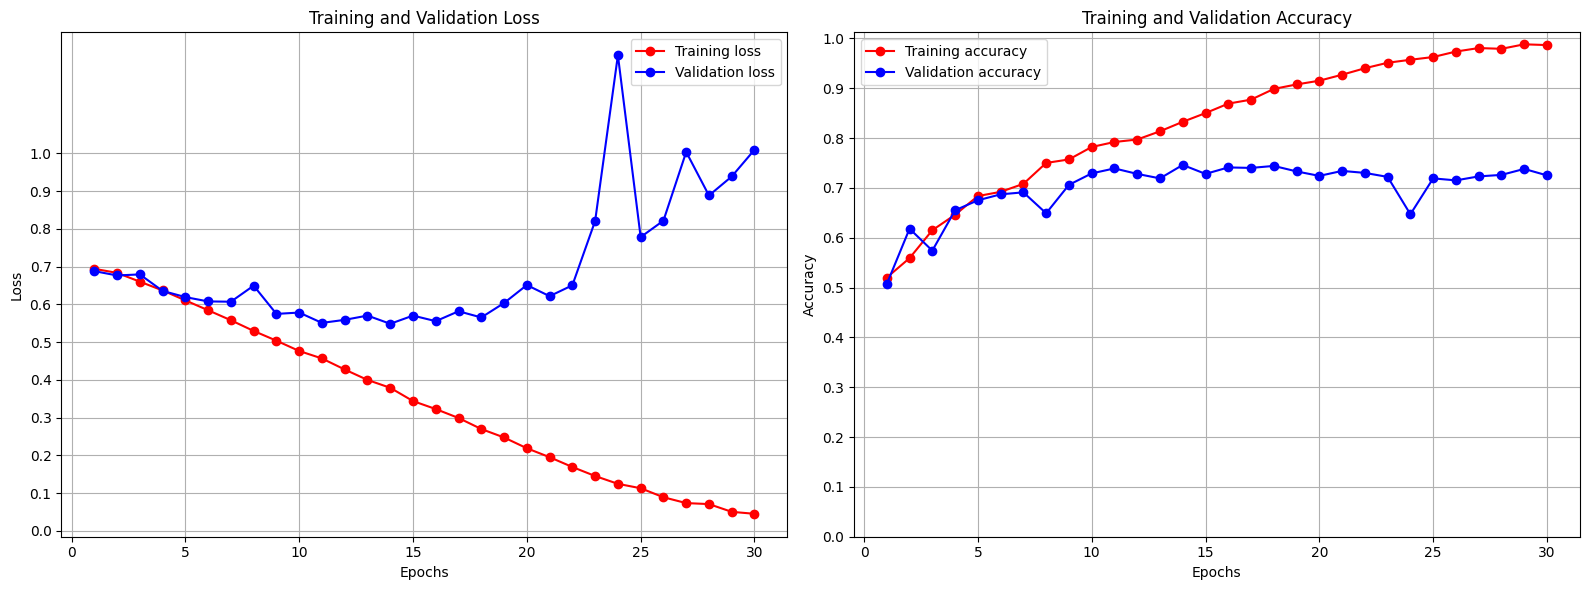

In [23]:
epochs = range(1, len(history_dict2['accuracy']) + 1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(epochs, history_dict2['loss'], 'r-o', label='Training loss')
ax1.plot(epochs, history_dict2['val_loss'], 'b-o', label='Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid(True)
ax1.legend()

loss_ticks = np.arange(0, 1.1, 0.1)
ax1.set_yticks(loss_ticks)

ax2.plot(epochs, history_dict2['accuracy'], 'r-o', label='Training accuracy')
ax2.plot(epochs, history_dict2['val_accuracy'], 'b-o', label='Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid(True)
ax2.legend()

accuracy_ticks = np.arange(0, 1.1, 0.1)
ax2.set_yticks(accuracy_ticks)

plt.tight_layout()
plt.show()
